<a href="https://colab.research.google.com/github/edsonhenriques/bootcamp_xp/blob/main/desm1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ciência de Dados - Renda Variável

# Desafio - Módulo 1

In [ ]:
# Importção das bibliotecas python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Conectar google drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: ignored

In [ ]:
df = pd.read_excel('/content/drive/MyDrive/Python/CDRV/MDL1/TP/dados/limpo/FIIS.xlsx')
 
df.head()

,TICKER,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,GESTAO,N COTAS
0,BLUR11,100.23,1.030000,12.33,100.91,0.99,1519.67,6.55,0.00,0.00,9.081831e+06,93,Ativa,90000
1,HBCR11,114.39,0.572983,5.11,102.23,1.12,1363.00,4.23,0.00,0.00,1.089596e+08,41,Ativa,1065777
2,BPFF11,59.84,0.620000,13.45,71.21,0.84,332943.88,4.04,7.95,-9.75,3.198823e+08,19328,Ativa,4492326
3,ZAVI11,126.00,1.050000,4.43,127.40,0.99,60893.15,6.34,0.00,0.00,1.180379e+08,163,Ativa,926518
4,BRHT11B,86.80,0.000000,0.00,77.10,1.13,0.00,2.01,0.00,0.00,1.419848e+08,11,Ativa,1841677


# Nova seção

In [ ]:
# Carrega os dados de arquivo CSV
#df = pd.read_csv('/content/drive/MyDrive/Python/CDRV/MDL1/TP/dados/bruto/dadosAcoes.csv', on_bad_lines='skip', sep = ';', decimal=',')

In [ ]:
# Mostra informações da estrutura do CSV e os tipos de objetos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 432 entries, 0 to 431
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TICKER                   432 non-null    object 
 1   PRECO                    432 non-null    float64
 2   ULTIMO DIVIDENDO         432 non-null    float64
 3   DY                       432 non-null    float64
 4   VALOR PATRIMONIAL COTA   432 non-null    float64
 5   P/VP                     432 non-null    float64
 6   LIQUIDEZ MEDIA DIARIA    432 non-null    float64
 7   PERCENTUAL EM CAIXA      432 non-null    float64
 8   CAGR DIVIDENDOS 3 ANOS   432 non-null    float64
 9    CAGR VALOR CORA 3 ANOS  432 non-null    float64
 10  PATRIMONIO               432 non-null    float64
 11  N COTISTAS               432 non-null    int64  
 12  GESTAO                   432 non-null    object 
 13   N COTAS                 432 non-null    int64  
dtypes: float64(10), int64(2), 

## Questões

 #### 1) Análise exploratória de um conjunto de dados

In [ ]:
df.describe()

,PRECO,ULTIMO DIVIDENDO,DY,VALOR PATRIMONIAL COTA,P/VP,LIQUIDEZ MEDIA DIARIA,PERCENTUAL EM CAIXA,CAGR DIVIDENDOS 3 ANOS,CAGR VALOR CORA 3 ANOS,PATRIMONIO,N COTISTAS,N COTAS
count,432.000000,432.000000,432.000000,432.000000,432.000000,4.320000e+02,432.000000,432.000000,432.000000,4.320000e+02,432.000000,4.320000e+02
mean,592.850810,10.888559,15.879213,586.598079,5.604005,5.189358e+05,15.798264,4.450926,-2.945579,4.284404e+08,23297.125000,7.240578e+06
std,5928.016396,171.443688,98.787593,4182.434276,94.415172,1.212633e+06,123.637797,18.308116,11.236849,7.847309e+08,63676.159082,1.757517e+07
min,0.000000,0.000000,0.000000,-16.530000,0.000000,0.000000e+00,0.000000,-70.720000,-69.940000,-1.253695e+07,0.000000,0.000000e+00
25%,11.427500,0.179854,0.000000,76.460000,0.530000,9.775000e+01,1.197500,0.000000,-1.262500,6.287938e+07,72.750000,5.189560e+05
50%,76.695000,0.700000,9.390000,97.750000,0.820000,3.010685e+04,2.425000,0.000000,0.000000,1.506372e+08,1540.000000,1.685606e+06
75%,100.000000,1.050000,13.372500,121.245000,0.940000,3.748152e+05,6.450000,3.622500,0.000000,3.915602e+08,11569.250000,5.621504e+06
max,94794.810000,3559.270493,1615.080000,64104.840000,1961.670000,9.951512e+06,2489.440000,142.930000,62.430000,7.561313e+09,792703.000000,2.260397e+08


#### 2) Criando gráfico de dispersão

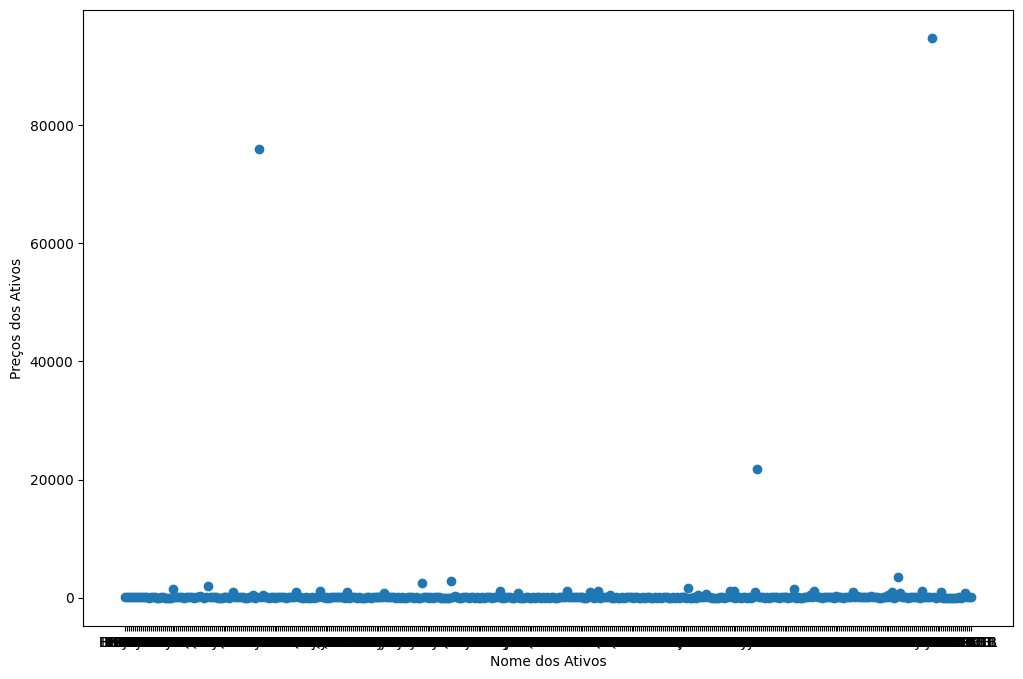

In [ ]:
#Atribuindo lista de ativos na variável ativos e preços
ativos = df.TICKER    # outra opção seria df["TICKER"]
precos = df.PRECO

# Criando o gráfico de dispersão
plt.figure(figsize=(12,8))
plt.scatter(ativos, precos)

#Definindo título do gráfico
plt.title = "Gráfico de dispersão Preço x FIIs"

# Definindo os rótulos dos eixos
plt.xlabel('Nome dos Ativos')
plt.ylabel('Preços dos Ativos')

# Exibindo o gráfico
plt.show()

### 3) Trabalhando com percentil 

Percentil 95:998.8505


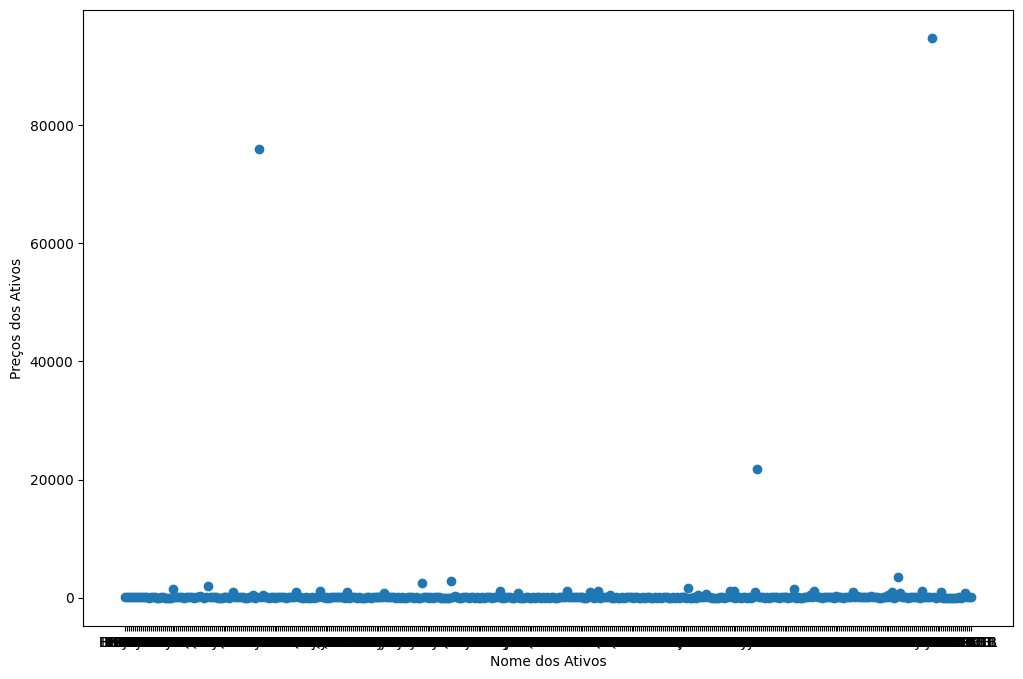

In [ ]:
# Trabalhando com percentil (Preço)

# Calculando o percentil de 95% dos dados
percentil_95 = np.percentile(precos, 95)

#Mostra o valor do percentil calculado
print("Percentil 95:" + str(percentil_95))

# Criando o gráfico de dispersão
plt.figure(figsize=(12,8))
plt.scatter(ativos, precos)

#Definindo título do gráfico e as legandas dos eixos
plt.title = "Gráfico de dispersão Preço x FIIs"
plt.xlabel('Nome dos Ativos')
plt.ylabel('Preços dos Ativos')

# Exibindo o gráfico
plt.show()

### 4. Cria uma reta no gráfico

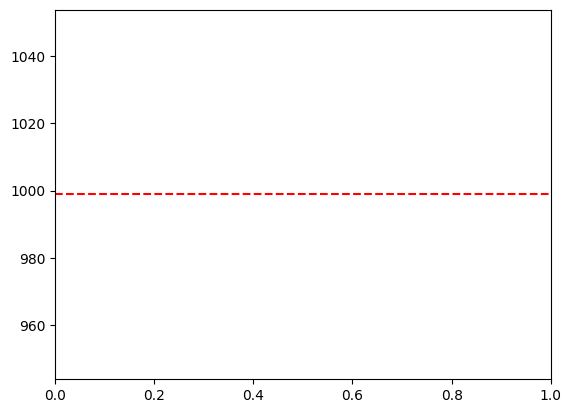

In [ ]:
# Criando a linha reta no gráfico no eixo X
plt.axhline(percentil_95, color='r', linestyle='--')



### 5) Exclua os preços = R$ 0,00 e valores acima do percentil calculado anteriormente.

In [ ]:
#Exclua os preços igual a zero e exclua os valores acima do percentil calculado anteriormente. 

#importa
import sys
sys.path.insert(1, '/content/drive/MyDrive/Python/CDRV/Desafio/dados')


df = df[df["PRECO"]!=0]
df = df[df["PRECO"]< percentil_95]

#Salva o resultado em um novo arquivo excel
output_file = "desafiolimpo.xlsx"

# index = False significa que nã irá incluir o numero de linha como uma nova coluna no excel
df.to_excel(output_file, index=False, )

print("Os outliers foram excluídos com sucesso")



Os outliers foram excluídos com sucesso


### 6) Limitando o gráfico para até o valor de R$ 200,00

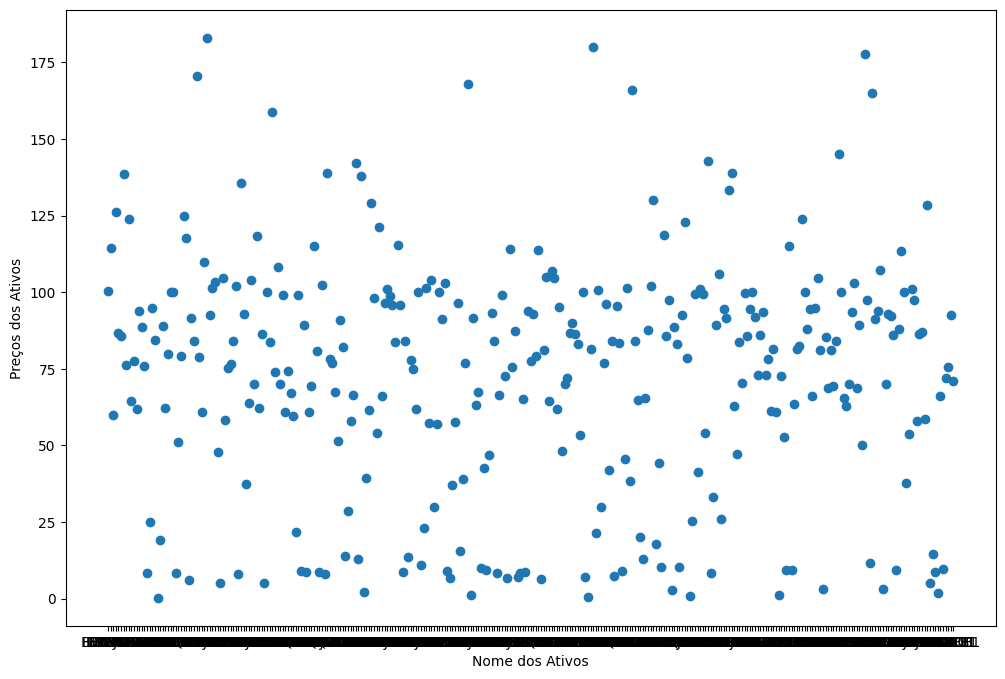

In [ ]:
df2= pd.read_excel('/content/drive/MyDrive/Python/CDRV/MDL1/Desafio/dados/desafiolimpo.xlsx')
 
#Filtrando os valores menores que 200,00
df2 = df2[df2["PRECO"]< 200]

#Atribuindo lista de ativos na variável ativos e preços
ativos2 = df2.TICKER    # outra opção seria df["TICKER"]
precos2 = df2.PRECO

# Criando o gráfico de dispersão
plt.figure(figsize=(12,8))
plt.scatter(ativos2, precos2)

#Definindo título do gráfico
plt.title = "Gráfico de dispersão Preço x FIIs"

# Definindo os rótulos dos eixos
plt.xlabel('Nome dos Ativos')
plt.ylabel('Preços dos Ativos')

# Exibindo o gráfico
plt.show()

### 7) Analisando parâmetro fundamentalista P/VP:


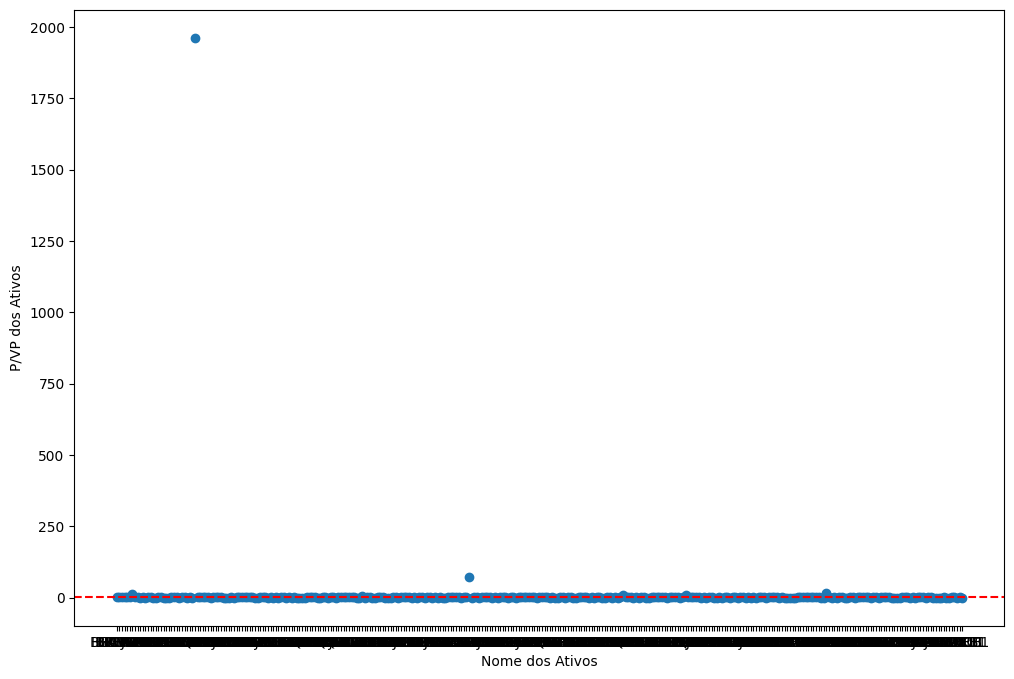

In [ ]:
PVP = df2["P/VP"]
ativos2 = df2["TICKER"]

# Criando o gráfico de dispersão
plt.figure(figsize=(12,8))
plt.scatter(ativos2, PVP)

#acrecentamos a constante P/VP = 1 que seria o preço justo dos FIIS
plt.axhline(1, color='r', linestyle='--')


#Definindo título do gráfico e legendas dos eixos x e y
plt.title = "Gráfico de dispersão Preço x FIIs"
plt.xlabel('Nome dos Ativos')
plt.ylabel('P/VP dos Ativos')

# Exibindo o gráfico
plt.show()

### 8) Trabalhando com filtros do percentil para reduzir os valores distorcido de P/VP

In [ ]:
# Trabalhando com percentil de P/VP
lower_bound = np.percentile(PVP,5)

#calcula qual o valor máximo que contempla 95% dos ativos em relação ao parametro P/VP
upper_bound = np.percentile(PVP,95)

df2 = df2[df2["P/VP"] > lower_bound]
df2 = df2[df2["P/VP"] < upper_bound]

#salva o novo dataframe um novo arquivo excel
output_file = "desafiolimpo3.xlsx"
df2.to_excel(output_file, index=False)

print("Outliers removidos com sucesso do dataframe")

Outliers removidos com sucesso do dataframe


### 9) Exibindo o gráfico mais legível com os valores de P/VP - Eliminando os outliers

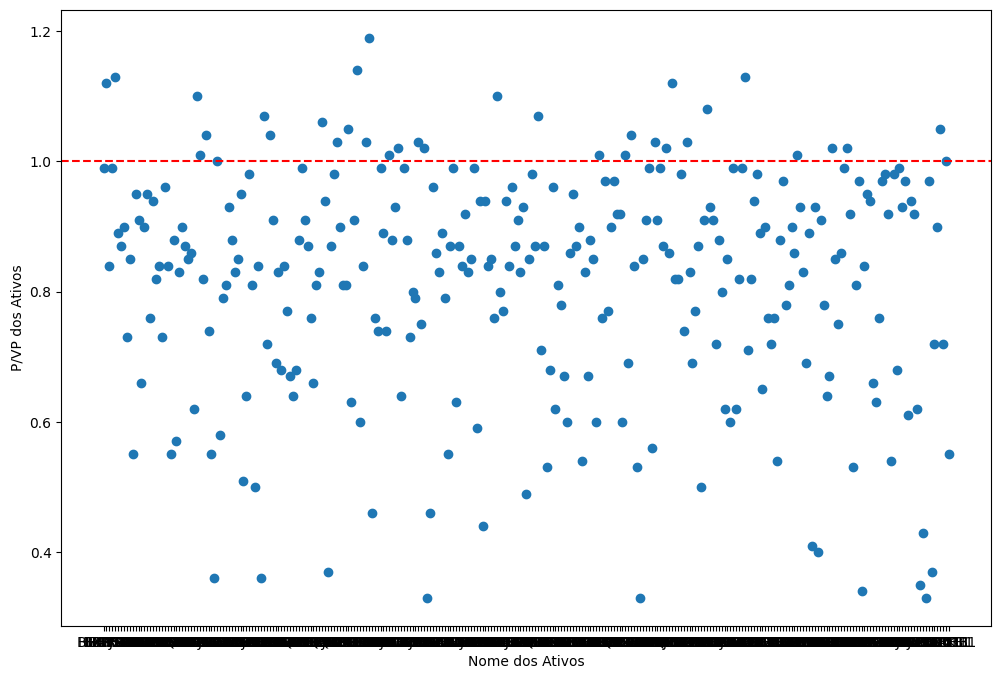

In [ ]:
df3= pd.read_excel('/content/drive/MyDrive/Python/CDRV/MDL1/Desafio/dados/desafiolimpo3.xlsx')
 

#Atribuindo lista de ativos na variável ativos e preços
ativos3 = df3["TICKER"]    # outra opção seria df["TICKER"]
precos3 = df3["P/VP"]

# Criando o gráfico de dispersão
plt.figure(figsize=(12,8))
plt.scatter(ativos3, precos3)

#Definindo título do gráfico
plt.title = "Gráfico de dispersão Preço x FIIs"

#acrecentamos a constante P/VP = 1 que seria o preço justo dos FIIS
plt.axhline(1, color='r', linestyle='--')

# Definindo os rótulos dos eixos
plt.xlabel('Nome dos Ativos')
plt.ylabel('P/VP dos Ativos')

# Exibindo o gráfico
plt.show()

### Trabalhando com médias móveis



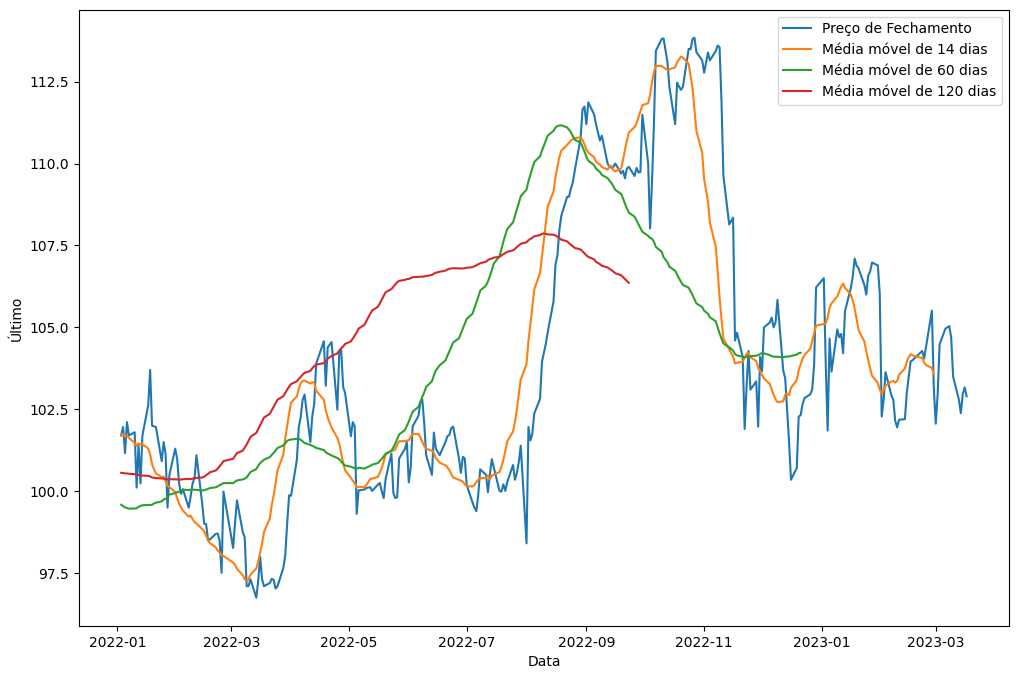

In [ ]:
# importando dados históricos do Fundo Imobiliario VISC11
df4 = pd.read_excel('/content/drive/MyDrive/Python/CDRV/MDL1/Desafio/dados/visc11.xlsx')




#calculando as médias móveis
df4['MA14']  = df4['Último'].rolling(window=14).mean()
df4['MA60']  = df4['Último'].rolling(window=60).mean()
df4['MA120'] = df4['Último'].rolling(window=120).mean()

#criando o gráfico de preço de fechamento e as médias móveis

plt.figure(figsize=(12,8))
plt.plot(df4['Data'], df4['Último'], label ='Preço de Fechamento')
plt.plot(df4['Data'], df4['MA14'], label ='Média móvel de 14 dias')
plt.plot(df4['Data'], df4['MA60'], label ='Média móvel de 60 dias')
plt.plot(df4['Data'], df4['MA120'], label ='Média móvel de 120 dias')
plt.xlabel('Data')
plt.ylabel('Último')
plt.legend()
plt.show()